In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn import datasets
from sklearn.decomposition import PCA

colNames=['outcome','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
          'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
          'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
          'veil-color','ring-number','ring-type','spore-print-color','population','habitat']




dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                      names=colNames)

#80/20 split
from sklearn.model_selection import train_test_split
DataSplit = train_test_split(dataset, test_size=0.2, random_state=11022017)
trainData, testData = DataSplit

dataframe = pd.DataFrame(trainData)

print("\n--------------------------------Abbreviated data frame--------------------------------")

display(dataframe)




--------------------------------Abbreviated data frame--------------------------------


,outcome,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2526,e,x,f,g,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
3130,e,f,y,g,t,n,f,c,b,p,...,s,g,g,p,w,o,p,k,v,d
3766,e,f,y,n,t,n,f,c,b,w,...,s,g,g,p,w,o,p,n,v,d
6835,p,f,y,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
2262,e,f,f,n,t,n,f,c,b,n,...,s,w,g,p,w,o,p,k,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,e,x,y,r,f,n,f,c,n,w,...,f,w,w,p,w,o,f,h,y,d
2500,e,f,s,w,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,s,g
3801,p,x,s,g,f,c,f,c,n,p,...,s,w,w,p,w,o,p,k,s,d
7415,e,x,s,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,v,p


In [2]:
from scipy.stats import chi2_contingency #to help choose features

colNamesCheck=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
          'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
          'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
          'veil-color','ring-number','ring-type','spore-print-color','population','habitat']



print("\n\n--------------------------------Chi Squared Contingency Tables--------------------------------\n\n")
#Output frequency tables for catagorical data:
for x in colNamesCheck:
    dataCT = pd.crosstab(dataframe['outcome'], dataframe[x])
    print("----------" + x + " Contingency Table ----------- \n")
    print(dataCT)
    
    print(" \n----------" + x + " Chi Squared-----------")
    chi = chi2_contingency(dataCT)
    display(chi)
    print("--->" + x + " Chi Squared P-value:---> ", chi[1], "\n\n\n")



--------------------------------Chi Squared Contingency Tables--------------------------------


----------cap-shape Contingency Table ----------- 

cap-shape    b  c     f    k   s     x
outcome                               
e          326  0  1270  183  28  1560
p           38  3  1247  482   0  1362
 
----------cap-shape Chi Squared-----------


(398.95691063126094,
 4.9782534643623335e-84,
 5,
 array([[1.88581012e+02, 1.55423911e+00, 1.30400662e+03, 3.44523004e+02,
         1.45062317e+01, 1.51382890e+03],
        [1.75418988e+02, 1.44576089e+00, 1.21299338e+03, 3.20476996e+02,
         1.34937683e+01, 1.40817110e+03]]))

--->cap-shape Chi Squared P-value:--->  4.9782534643623335e-84 



----------cap-surface Contingency Table ----------- 

cap-surface     f  g     s     y
outcome                         
e            1254  0   931  1182
p             595  3  1123  1411
 
----------cap-surface Chi Squared-----------


(267.89774548726643,
 8.795903191804824e-58,
 3,
 array([[ 957.92937375,    1.55423911, 1064.13571319, 1343.38067395],
        [ 891.07062625,    1.44576089,  989.86428681, 1249.61932605]]))

--->cap-surface Chi Squared P-value:--->  8.795903191804824e-58 



----------cap-color Contingency Table ----------- 

cap-color    b   c    e    g     n   p   r   u    w    y
outcome                                                 
e           36  26  495  804  1032  49  13  12  575  325
p          102  10  706  630   817  68   0   0  258  541
 
----------cap-color Chi Squared-----------


(316.3712488874609,
 8.748847400390375e-63,
 9,
 array([[ 71.49499923,  18.65086936, 622.21372519, 742.92629635,
         957.92937375,  60.61532543,   6.73503616,   6.21695645,
         431.56039391, 448.65702416],
        [ 66.50500077,  17.34913064, 578.78627481, 691.07370365,
         891.07062625,  56.38467457,   6.26496384,   5.78304355,
         401.43960609, 417.34297584]]))

--->cap-color Chi Squared P-value:--->  8.748847400390375e-63 



----------bruises Contingency Table ----------- 

bruises     f     t
outcome            
e        1183  2184
p        2615   517
 
----------bruises Chi Squared-----------


(1560.3140103024512,
 0.0,
 1,
 array([[1967.66671796, 1399.33328204],
        [1830.33328204, 1301.66671796]]))

--->bruises Chi Squared P-value:--->  0.0 



----------odor Contingency Table ----------- 

odor       a    c     f    l   m     n    p    s    y
outcome                                              
e        324    0     0  320   0  2723    0    0    0
p          0  146  1724    0  29    98  212  455  468
 
----------odor Chi Squared-----------


(6120.122482563785,
 0.0,
 8,
 array([[ 167.85782428,   75.63963687,  893.16941068,  165.78550546,
           15.02431143, 1461.50284659,  109.83289737,  235.72626558,
          242.46130174],
        [ 156.14217572,   70.36036313,  830.83058932,  154.21449454,
           13.97568857, 1359.49715341,  102.16710263,  219.27373442,
          225.53869826]]))

--->odor Chi Squared P-value:--->  0.0 



----------gill-attachment Contingency Table ----------- 

gill-attachment    a     f
outcome                   
e                165  3202
p                 16  3116
 
----------gill-attachment Chi Squared-----------


(113.86599925652082,
 1.394189133649505e-26,
 1,
 array([[  93.77242653, 3273.22757347],
        [  87.22757347, 3044.77242653]]))

--->gill-attachment Chi Squared P-value:--->  1.394189133649505e-26 



----------gill-spacing Contingency Table ----------- 

gill-spacing     c    w
outcome                
e             2404  963
p             3042   90
 
----------gill-spacing Chi Squared-----------


(789.1541330063818,
 1.230744431276688e-173,
 1,
 array([[2821.46207109,  545.53792891],
        [2624.53792891,  507.46207109]]))

--->gill-spacing Chi Squared P-value:--->  1.230744431276688e-173 



----------gill-size Contingency Table ----------- 

gill-size     b     n
outcome              
e          3134   233
p          1356  1776
 
----------gill-size Chi Squared-----------


(1880.798086646908,
 0.0,
 1,
 array([[2326.17787352, 1040.82212648],
        [2163.82212648,  968.17787352]]))

--->gill-size Chi Squared P-value:--->  0.0 



----------gill-color Contingency Table ----------- 

gill-color     b   e    g    h    k    n   o    p   r    u    w   y
outcome                                                            
e              0  79  203  167  265  749  54  685   0  351  758  56
p           1382   0  392  434   56   96   0  501  21   36  195  19
 
----------gill-color Chi Squared-----------


(2986.56030647507,
 0.0,
 11,
 array([[715.98615172,  40.92829666, 308.25742422, 311.36590245,
         166.30358517, 437.77735036,  27.97630405, 614.44252962,
          10.8796738 , 200.49684567, 493.72995846,  38.85597784],
        [666.01384828,  38.07170334, 286.74257578, 289.63409755,
         154.69641483, 407.22264964,  26.02369595, 571.55747038,
          10.1203262 , 186.50315433, 459.27004154,  36.14402216]]))

--->gill-color Chi Squared P-value:--->  0.0 



----------stalk-shape Contingency Table ----------- 

stalk-shape     e     t
outcome                
e            1316  2051
p            1514  1618
 
----------stalk-shape Chi Squared-----------


(56.154474404835724,
 6.699496401158025e-14,
 1,
 array([[1466.16556393, 1900.83443607],
        [1363.83443607, 1768.16556393]]))

--->stalk-shape Chi Squared P-value:--->  6.699496401158025e-14 



----------stalk-root Contingency Table ----------- 

stalk-root     ?     b    c    e    r
outcome                              
e            593  1509  414  698  153
p           1405  1480   35  212    0
 
----------stalk-root Chi Squared-----------


(1055.6353363582693,
 3.126116909366243e-227,
 4,
 array([[1035.12324973, 1548.54023696,  232.61778735,  471.45253116,
           79.2661948 ],
        [ 962.87675027, 1440.45976304,  216.38221265,  438.54746884,
           73.7338052 ]]))

--->stalk-root Chi Squared P-value:--->  3.126116909366243e-227 



----------stalk-surface-above-ring Contingency Table ----------- 

stalk-surface-above-ring    f     k     s   y
outcome                                      
e                         324   119  2911  13
p                         120  1774  1232   6
 
----------stalk-surface-above-ring Chi Squared-----------


(2218.0689303344357,
 0.0,
 3,
 array([[ 230.02738883,  980.72488075, 2146.40421603,    9.84351439],
        [ 213.97261117,  912.27511925, 1996.59578397,    9.15648561]]))

--->stalk-surface-above-ring Chi Squared P-value:--->  0.0 



----------stalk-surface-below-ring Contingency Table ----------- 

stalk-surface-below-ring    f     k     s    y
outcome                                       
e                         375   116  2710  166
p                         114  1728  1232   58
 
----------stalk-surface-below-ring Chi Squared-----------


(2149.0355720950865,
 0.0,
 3,
 array([[ 253.34097553,  955.33897523, 2042.27019541,  116.04985382],
        [ 235.65902447,  888.66102477, 1899.72980459,  107.95014618]]))

--->stalk-surface-below-ring Chi Squared P-value:--->  0.0 



----------stalk-color-above-ring Contingency Table ----------- 

stalk-color-above-ring    b   c   e    g    n    o     p     w  y
outcome                                                          
e                         0   0  81  450   13  165   459  2199  0
p                       339  29   0    0  345    0  1043  1370  6
 
----------stalk-color-above-ring Chi Squared-----------


(1791.3593436699055,
 0.0,
 8,
 array([[ 175.62901985,   15.02431143,   41.96445607,  233.13586706,
          185.47253424,   85.48315125,  778.15571626, 1849.02646561,
            3.10847823],
        [ 163.37098015,   13.97568857,   39.03554393,  216.86413294,
          172.52746576,   79.51684875,  723.84428374, 1719.97353439,
            2.89152177]]))

--->stalk-color-above-ring Chi Squared P-value:--->  0.0 



----------stalk-color-below-ring Contingency Table ----------- 

stalk-color-below-ring    b   c   e    g    n    o     p     w   y
outcome                                                           
e                         0   0  80  436   50  165   449  2187   0
p                       348  29   0    0  347    0  1052  1341  15
 
----------stalk-color-below-ring Chi Squared-----------


(1734.0706086281318,
 0.0,
 8,
 array([[ 180.29173719,   15.02431143,   41.44637637,  225.88275119,
          205.67764271,   85.48315125,  777.63763656, 1827.78519772,
            7.77119557],
        [ 167.70826281,   13.97568857,   38.55362363,  210.11724881,
          191.32235729,   79.51684875,  723.36236344, 1700.21480228,
            7.22880443]]))

--->stalk-color-below-ring Chi Squared P-value:--->  0.0 



----------veil-type Contingency Table ----------- 

veil-type     p
outcome        
e          3367
p          3132
 
----------veil-type Chi Squared-----------


(0.0,
 1.0,
 0,
 array([[3367.],
        [3132.]]))

--->veil-type Chi Squared P-value:--->  1.0 



----------veil-color Contingency Table ----------- 

veil-color   n   o     w  y
outcome                    
e           82  83  3202  0
p            0   0  3126  6
 
----------veil-color Chi Squared-----------


(163.62925321750356,
 3.0189775608445934e-35,
 3,
 array([[4.24825358e+01, 4.30006155e+01, 3.27840837e+03, 3.10847823e+00],
        [3.95174642e+01, 3.99993845e+01, 3.04959163e+03, 2.89152177e+00]]))

--->veil-color Chi Squared P-value:--->  3.0189775608445934e-35 



----------ring-number Contingency Table ----------- 

ring-number   n     o    t
outcome                   
e             0  2939  428
p            29  3041   62
 
----------ring-number Chi Squared-----------


(296.0089625879048,
 5.278013261410891e-65,
 2,
 array([[  15.02431143, 3098.11663333,  253.85905524],
        [  13.97568857, 2881.88336667,  236.14094476]]))

--->ring-number Chi Squared P-value:--->  5.278013261410891e-65 



----------ring-type Contingency Table ----------- 

ring-type     e   f     l   n     p
outcome                            
e           812  38     0   0  2517
p          1411   0  1029  29   663
 
----------ring-type Chi Squared-----------


(2332.8737176783734,
 0.0,
 4,
 array([[1151.69118326,   19.68702877,  533.104016  ,   15.02431143,
         1647.49346053],
        [1071.30881674,   18.31297123,  495.895984  ,   13.97568857,
         1532.50653947]]))

--->ring-type Chi Squared P-value:--->  0.0 



----------spore-print-color Contingency Table ----------- 

spore-print-color   b     h     k     n   o   r   u     w   y
outcome                                                      
e                  35    38  1320  1386  41   0  38   465  44
p                   0  1265   183   175   0  62   0  1447   0
 
----------spore-print-color Chi Squared-----------


(3675.6960105194607,
 0.0,
 8,
 array([[ 18.13278966, 675.05785505, 778.67379597, 808.72241883,
          21.24126789,  32.12094168,  19.68702877, 990.56839514,
          22.795507  ],
        [ 16.86721034, 627.94214495, 724.32620403, 752.27758117,
          19.75873211,  29.87905832,  18.31297123, 921.43160486,
          21.204493  ]]))

--->spore-print-color Chi Squared P-value:--->  0.0 



----------population Contingency Table ----------- 

population    a    c    n    s     v    y
outcome                                  
e           304  238  329  709   953  834
p             0   42    0  300  2275  515
 
----------population Chi Squared-----------


(1546.3615853742983,
 0.0,
 5,
 array([[ 157.49623019,  145.06231728,  170.4482228 ,  522.74242191,
         1672.36128635,  698.88952146],
        [ 146.50376981,  134.93768272,  158.5517772 ,  486.25757809,
         1555.63871365,  650.11047854]]))

--->population Chi Squared P-value:--->  0.0 



----------habitat Contingency Table ----------- 

habitat     d     g    l    m    p    u    w
outcome                                     
e        1479  1137  202  199  111   81  158
p        1000   592  469   31  810  230    0
 
----------habitat Chi Squared-----------


(1246.3292395552014,
 4.493799868624631e-266,
 6,
 array([[1284.31958763,  895.7598092 ,  347.63148177,  119.15833205,
          477.15140791,  161.12278812,   81.85659332],
        [1194.68041237,  833.2401908 ,  323.36851823,  110.84166795,
          443.84859209,  149.87721188,   76.14340668]]))

--->habitat Chi Squared P-value:--->  4.493799868624631e-266 





In [3]:
reducedCols=['outcome','bruises','gill-attachment','gill-spacing','gill-size','stalk-surface-above-ring',
               'stalk-surface-below-ring']

#to change the two binary categories to 0 and 1 from chars.
def binaryCat(x):
    if x == 't' or  x == 'b' or  x == 'a' or  x == 'p' or  x == 'c':
        x = 1
    elif x == 'f' or  x == 'n' or  x == 'w':
         x = 0
    elif  x == 'e':
         x = -1;
    return x

reducedData = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                         names=colNames,usecols=reducedCols, converters={'outcome': binaryCat,
                                                                         'bruises': binaryCat,
                                                                         'gill-size' : binaryCat,
                                                                         'gill-attachment' : binaryCat,
                                                                         'gill-spacing' : binaryCat })

#80/20 split
from sklearn.model_selection import train_test_split
DataSplit = train_test_split(reducedData, test_size=0.2, random_state=11022017)
trainData, testData = DataSplit

rdf = pd.DataFrame(trainData)
rdftest = pd.DataFrame(testData)

rdfdum = pd.get_dummies(rdf)
rdfdumtest = pd.get_dummies(rdftest)

display(rdfdum)


,outcome,bruises,gill-attachment,gill-spacing,gill-size,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y
2526,-1,1,0,1,1,0,0,1,0,0,0,1,0
3130,-1,1,0,1,1,0,0,1,0,0,0,1,0
3766,-1,1,0,1,1,0,0,1,0,0,0,1,0
6835,1,0,0,1,0,0,1,0,0,0,1,0,0
2262,-1,1,0,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,-1,0,0,1,0,0,0,1,0,1,0,0,0
2500,-1,0,0,0,1,1,0,0,0,1,0,0,0
3801,1,0,0,1,0,0,0,1,0,0,0,1,0
7415,-1,1,0,1,1,0,0,1,0,0,0,1,0


In [4]:
features=['bruises','gill-attachment','gill-spacing','gill-size','stalk-surface-above-ring_f',
          'stalk-surface-above-ring_k','stalk-surface-above-ring_s', 'stalk-surface-below-ring_f',
          'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s']

#export features data files for java input
rdfdum.to_csv('rdfdum-train-features.csv', columns=features, index=False, header=False)
rdfdumtest.to_csv('rdfdum-test-features.csv', columns=features, index=False, header=False)

In [5]:
#export target data files for java input
rdfdumtest.to_csv('rdfdum-test-targets.csv', columns=['outcome'], index=False,  header=False)
rdfdum.to_csv('rdfdum-train-targets.csv', columns=['outcome'], index=False,  header=False)

Visualizing the data


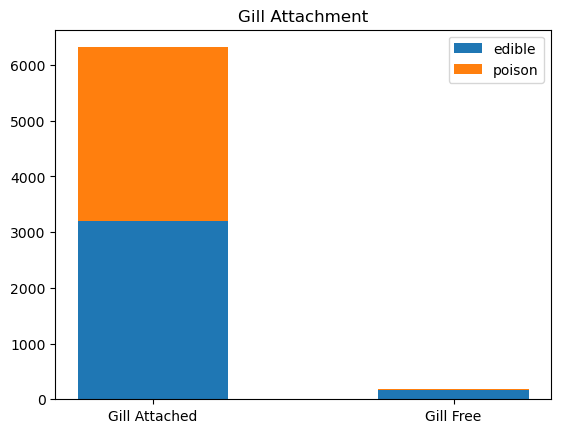

In [6]:
print("Visualizing the data")

features = (
    "Gill Attached",
    "Gill Free",
)
weight_counts = {
    "edible": np.array([3202, 165]),
    "poison": np.array([3116, 16]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(features, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Gill Attachment")
ax.legend(loc="upper right")
plt.show()

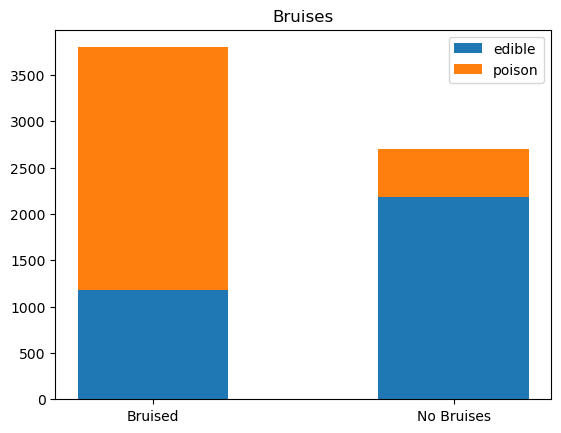

In [7]:
features = (
    "Bruised",
    "No Bruises",
)
weight_counts = {
    "edible": np.array([1183, 2184]),
    "poison": np.array([2615, 517]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(features, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Bruises")
ax.legend(loc="upper right")
plt.show()

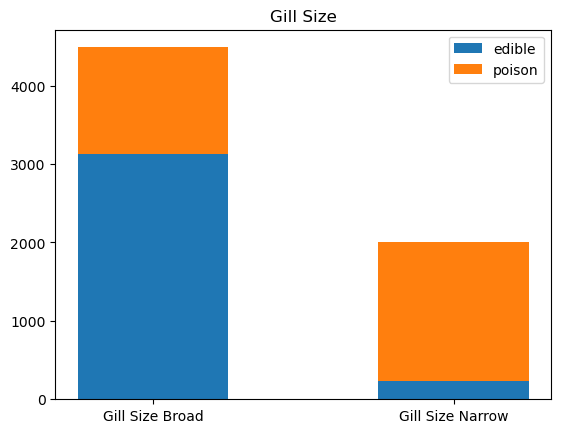

In [8]:
features = (
    "Gill Size Broad",
    "Gill Size Narrow",
)
weight_counts = {
    "edible": np.array([3134, 233]),
    "poison": np.array([1356, 1776]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(features, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Gill Size")
ax.legend(loc="upper right")
plt.show()

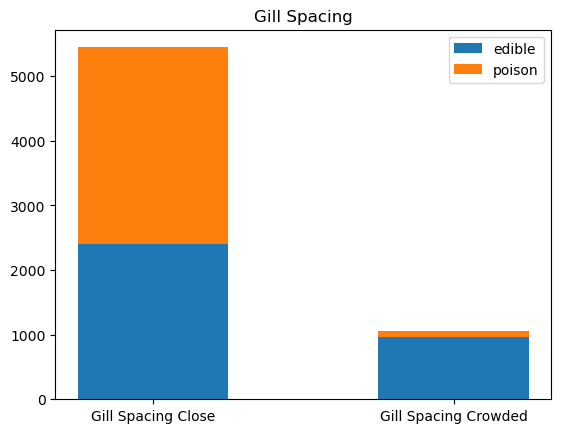

In [9]:
features = (
    "Gill Spacing Close",
    "Gill Spacing Crowded",
)
weight_counts = {
    "edible": np.array([2404, 963]),
    "poison": np.array([3042, 90]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(features, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Gill Spacing")
ax.legend(loc="upper right")
plt.show()

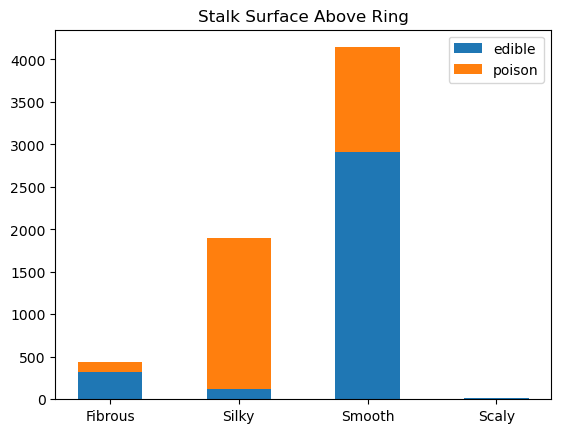

In [10]:
features = (
    "Fibrous",
    "Silky",
    "Smooth",
    "Scaly",
)
weight_counts = {
    "edible": np.array([324, 119, 2911, 13]),
    "poison": np.array([120, 1774, 1232, 6]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(features, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stalk Surface Above Ring")
ax.legend(loc="upper right")
plt.show()

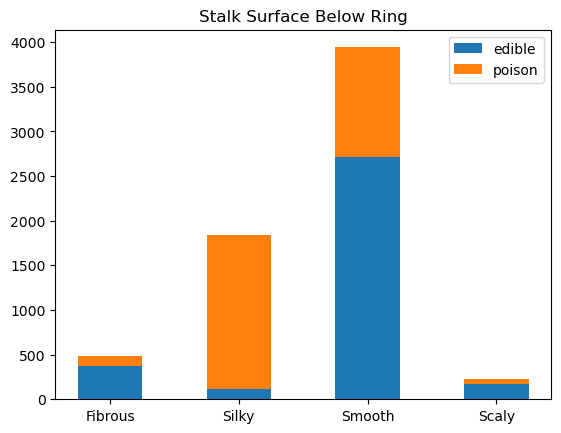

In [11]:
features = (
    "Fibrous",
    "Silky",
    "Smooth",
    "Scaly",
)
weight_counts = {
    "edible": np.array([375, 116, 2710, 166]),
    "poison": np.array([114, 1728, 1232, 58]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(features, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stalk Surface Below Ring")
ax.legend(loc="upper right")
plt.show()

In [12]:
print("impliment via scikit learn\n")
trainData = pd.read_csv('rdfdum-train-features.csv')
trainLabels = pd.read_csv('rdfdum-train-targets.csv')
testData = pd.read_csv('rdfdum-test-features.csv')
testLabels = pd.read_csv('rdfdum-test-targets.csv')
trainData = pd.DataFrame(trainData)

trainDataX = trainData.to_numpy()
trainLabelsY = trainLabels.to_numpy().ravel()
testDataX = testData.to_numpy()
testLabelsY = testLabels.to_numpy().ravel()

# logistic regression
from sklearn.linear_model import LogisticRegression
#Gradient Descent
logisticReg = LogisticRegression()
logisticReg.fit(trainDataX,trainLabelsY)

print(logisticReg.coef_) # weights
print(logisticReg.intercept_) # Theta_0
logisticReg.score(testDataX, testLabelsY)

impliment via scikit learn

[[ 1.22610138 -0.02510714  3.91453148 -5.40265417  0.79529447  2.26103416
  -2.59965764  1.00587771  2.62418885  0.17537951]]
[0.29285893]


0.9458128078817734

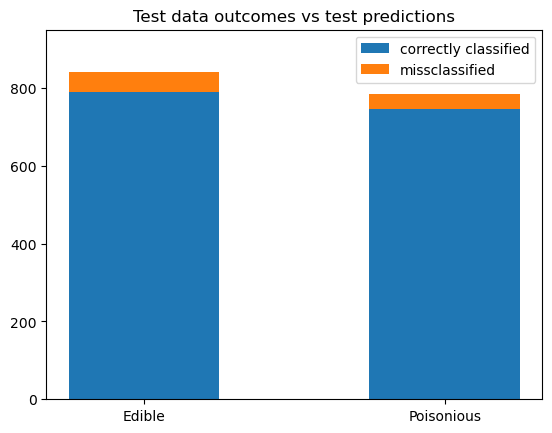

In [13]:
features = (
    "Edible",
    "Poisonious",
)
weight_counts = {
    "correctly classified": np.array([791, 745]),
    "missclassified": np.array([50, 39])
    
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(features, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Test data outcomes vs test predictions")
ax.legend(loc="upper right")
plt.ylim(0,950)
plt.show()


Results of test labels compared to predicted labels for the same data. green line is 75% threshold
Blue is the actual outcomes from the test data, 0 is edible, 1 is poisonious
The top right of the line and bottom left of the line show misclassified data


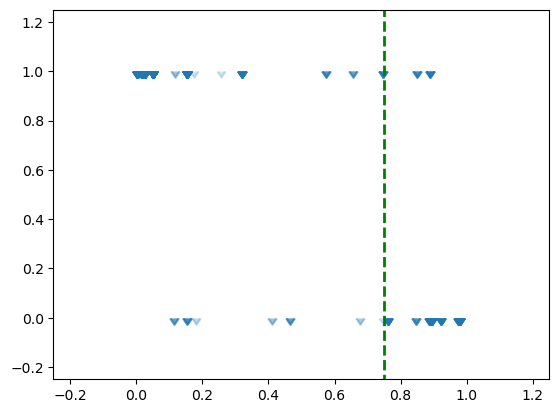

In [14]:

ytestAs01 = testLabelsY


yhatTestProb =  np.array([0.88895, 0.88895, 0.05068, 0.31966, 0.88895, 0.15312, 0.76123, 0.00312, 0.01923, 0.88895, 0.88927, 0.88939, 0.02808, 0.88927, 0.00312, 0.88895, 0.00312, 0.88895, 0.88895, 0.05068, 0.00312, 0.88895, 0.01923, 0.88895, 0.92267, 0.01923, 0.74708, 0.05068, 0.88895, 0.89448, 0.98052, 0.88939, 0.15312, 0.88895, 0.15312, 0.88474, 0.31966, 0.88474, 0.88895, 0.15312, 0.98052, 0.97279, 0.15312, 0.88895, 0.57417, 0.88895, 0.05068, 0.88895, 0.88895, 0.02808, 0.01923, 0.15312, 0.01923, 0.05068, 0.00312, 0.88895, 0.00312, 0.00312, 0.05068, 0.00312, 0.88895, 0.05068, 0.88895, 0.05068, 0.41188, 0.74708, 0.88895, 0.88895, 0.88895, 0.15312, 0.15312, 0.15312, 0.88895, 0.88895, 0.05068, 0.97279, 0.88895, 0.88939, 0.05068, 0.88895, 0.05068, 0.88939, 0.17363, 0.57417, 0.31966, 0.05068, 0.05068, 0.88895, 0.05068, 0.88895, 0.11383, 0.01923, 0.74708, 0.88895, 0.88895, 0.88895, 0.92267, 0.88895, 0.00312, 0.88895, 0.92267, 0.05068, 0.88895, 0.05068, 0.05068, 0.88895, 0.92267, 0.00312, 0.97279, 0.88895, 0.88895, 0.88927, 0.88895, 0.05068, 0.00312, 0.02808, 0.89448, 0.02808, 0.88895, 0.02808, 0.15312, 0.88939, 0.88895, 0.88895, 0.74708, 0.15312, 0.02808, 0.88895, 0.88895, 0.15312, 0.01923, 0.17973, 0.88895, 0.76123, 0.88895, 0.92267, 0.00312, 0.88927, 0.88474, 0.88895, 0.88895, 0.88895, 0.88895, 0.05068, 0.02808, 0.88895, 0.11744, 0.89448, 0.01923, 0.88895, 0.31966, 0.01923, 0.02808, 0.05068, 0.31966, 0.05068, 0.88895, 0.01923, 0.05068, 0.05068, 0.01923, 0.84516, 0.88895, 0.05068, 0.92267, 0.89448, 0.05068, 0.00312, 0.88895, 0.05068, 0.89448, 0.88895, 0.15312, 0.98052, 0.88895, 0.88895, 0.88895, 0.15312, 0.05068, 0.01923, 0.31966, 0.88927, 0.88895, 0.76123, 0.98052, 0.01923, 0.15312, 0.92267, 0.05068, 0.00312, 0.01923, 0.88895, 0.76123, 0.88927, 0.05068, 0.15312, 0.00312, 0.05068, 0.88895, 0.88895, 0.98052, 0.05068, 0.15312, 0.88895, 0.89448, 0.88895, 0.31966, 0.57417, 0.88895, 0.88895, 0.65492, 0.84516, 0.15312, 0.01923, 0.76123, 0.88895, 0.88895, 0.01923, 0.88895, 0.01923, 0.15312, 0.98052, 0.88895, 0.05068, 0.88895, 0.88895, 0.74708, 0.05068, 0.97279, 0.05068, 0.05068, 0.74708, 0.00312, 0.88895, 0.76123, 0.15312, 0.88895, 0.89448, 0.97279, 0.98052, 0.02808, 0.05068, 0.92267, 0.41188, 0.00312, 0.88895, 0.88895, 0.88939, 0.88927, 0.98052, 0.05068, 0.02808, 0.88895, 0.88927, 0.98052, 0.88927, 0.02808, 0.00312, 0.88895, 0.05068, 0.05068, 0.15312, 0.98052, 0.05068, 0.02808, 0.92267, 0.15312, 0.02808, 0.05068, 0.98052, 0.31966, 0.15312, 0.00312, 0.88895, 0.88895, 0.05068, 0.88895, 0.02808, 0.02808, 0.88895, 0.00312, 0.00312, 0.88895, 0.97279, 0.88895, 0.05068, 0.88939, 0.01923, 0.15312, 0.15312, 0.98052, 0.57417, 0.00775, 0.88895, 0.02808, 0.88895, 0.88895, 0.02808, 0.05068, 0.85046, 0.00312, 0.01923, 0.92267, 0.05068, 0.02808, 0.67727, 0.88895, 0.05068, 0.02808, 0.00312, 0.89448, 0.88895, 0.31966, 0.01923, 0.88895, 0.31966, 0.88895, 0.88895, 0.41188, 0.88895, 0.98052, 0.88895, 0.05068, 0.02808, 0.31966, 0.88895, 0.15312, 0.05068, 0.76123, 0.89448, 0.15312, 0.98052, 0.00312, 0.02808, 0.88895, 0.02808, 0.57417, 0.05068, 0.05068, 0.88895, 0.00312, 0.89448, 0.88895, 0.85046, 0.88474, 0.05068, 0.85046, 0.88927, 0.88895, 0.05068, 0.57417, 0.88895, 0.05068, 0.88895, 0.88895, 0.88895, 0.15312, 0.97279, 0.88895, 0.92267, 0.98052, 0.05068, 0.00312, 0.05068, 0.88895, 0.05068, 0.88895, 0.15312, 0.88895, 0.05068, 0.00312, 0.88927, 0.88895, 0.88895, 0.88895, 0.88895, 0.02808, 0.01923, 0.88895, 0.02808, 0.00312, 0.46585, 0.88895, 0.31966, 0.98052, 0.57417, 0.76123, 0.46585, 0.31966, 0.00312, 0.31966, 0.00312, 0.88895, 0.88895, 0.88895, 0.89448, 0.02808, 0.88895, 0.15312, 0.00312, 0.00312, 0.88895, 0.98052, 0.00312, 0.97279, 0.05068, 0.88927, 0.02808, 0.88895, 0.15312, 0.88895, 0.00312, 0.05068, 0.88895, 0.57417, 0.88895, 0.88474, 0.98052, 0.11383, 0.15312, 0.01923, 0.15312, 0.88895, 0.01923, 0.88895, 0.02808, 0.01923, 0.05068, 0.15312, 0.88927, 0.05068, 0.01923, 0.88895, 0.89448, 0.88895, 0.15312, 0.05068, 0.01923, 0.01923, 0.00312, 0.98052, 0.05068, 0.05068, 0.88895, 0.88895, 0.88895, 0.00775, 0.88895, 0.05068, 0.88895, 0.97279, 0.02808, 0.05068, 0.89448, 0.98052, 0.88895, 0.88895, 0.88474, 0.89448, 0.88895, 0.97279, 0.88895, 0.15312, 0.02808, 0.88927, 0.88895, 0.15312, 0.88895, 0.74708, 0.05068, 0.00775, 0.05068, 0.88895, 0.05068, 0.88895, 0.05068, 0.11383, 0.88895, 0.05068, 0.88895, 0.88895, 0.05068, 0.05068, 0.88895, 0.15312, 0.76123, 0.88895, 0.88895, 0.88895, 0.02808, 0.88895, 0.05068, 0.89448, 0.98052, 0.88895, 0.88895, 0.76123, 0.01923, 0.88895, 0.92267, 0.74708, 0.88895, 0.05068, 0.00312, 0.88895, 0.31966, 0.98052, 0.05068, 0.05068, 0.88895, 0.88895, 0.05068, 0.88895, 0.01923, 0.89448, 0.88895, 0.88895, 0.74708, 0.05068, 0.05068, 0.88895, 0.88895, 0.85046, 0.88895, 0.02808, 0.88895, 0.05068, 0.76123, 0.88895, 0.02808, 0.88895, 0.88895, 0.88895, 0.76123, 0.88895, 0.05068, 0.88895, 0.97279, 0.88895, 0.15312, 0.00312, 0.88895, 0.92267, 0.76123, 0.41188, 0.00312, 0.88895, 0.65492, 0.88895, 0.05068, 0.88895, 0.76123, 0.05068, 0.88895, 0.57417, 0.00312, 0.88895, 0.05068, 0.15312, 0.88939, 0.01923, 0.85046, 0.05068, 0.88895, 0.15312, 0.05068, 0.88895, 0.00312, 0.57417, 0.98052, 0.01923, 0.88895, 0.88895, 0.67727, 0.88895, 0.65492, 0.88895, 0.88895, 0.88895, 0.98052, 0.02808, 0.76123, 0.05068, 0.05068, 0.15312, 0.05068, 0.01923, 0.05068, 0.00775, 0.15312, 0.88895, 0.89448, 0.88895, 0.88895, 0.02808, 0.15312, 0.15312, 0.88895, 0.15312, 0.84516, 0.88895, 0.88895, 0.88895, 0.88895, 0.02808, 0.98052, 0.05068, 0.89448, 0.97279, 0.00312, 0.05068, 0.88895, 0.01923, 0.76123, 0.98052, 0.88895, 0.88895, 0.88895, 0.98052, 0.88895, 0.88895, 0.88895, 0.88895, 0.00312, 0.88895, 0.88895, 0.15312, 0.05068, 0.88895, 0.15312, 0.88895, 0.15312, 0.88895, 0.15312, 0.15312, 0.88895, 0.89448, 0.02808, 0.88895, 0.88895, 0.15312, 0.05068, 0.88895, 0.88895, 0.05068, 0.15312, 0.89448, 0.88895, 0.88895, 0.00312, 0.02808, 0.05068, 0.88895, 0.85046, 0.05068, 0.92267, 0.76123, 0.88895, 0.88895, 0.15312, 0.02808, 0.05068, 0.88895, 0.89448, 0.15312, 0.89448, 0.88895, 0.15312, 0.88895, 0.98052, 0.65492, 0.01923, 0.01923, 0.97279, 0.31966, 0.88895, 0.88895, 0.01923, 0.00312, 0.88927, 0.74708, 0.88474, 0.00312, 0.88895, 0.88895, 0.05068, 0.88895, 0.88895, 0.88895, 0.88895, 0.88927, 0.88895, 0.92267, 0.01923, 0.00312, 0.88895, 0.15312, 0.88895, 0.92267, 0.15312, 0.25756, 0.05068, 0.88895, 0.88895, 0.31966, 0.88895, 0.84516, 0.05068, 0.88895, 0.05068, 0.98052, 0.88895, 0.88895, 0.01923, 0.88895, 0.01923, 0.05068, 0.88895, 0.05068, 0.84516, 0.11744, 0.05068, 0.01923, 0.15312, 0.98052, 0.88895, 0.88895, 0.88895, 0.31966, 0.15312, 0.05068, 0.97279, 0.05068, 0.02808, 0.88895, 0.05068, 0.88927, 0.88895, 0.88895, 0.88895, 0.01923, 0.88895, 0.05068, 0.88474, 0.88895, 0.74708, 0.88895, 0.88895, 0.98052, 0.02808, 0.46585, 0.76123, 0.01923, 0.89448, 0.88895, 0.88895, 0.85046, 0.01923, 0.92267, 0.05068, 0.00312, 0.05068, 0.88895, 0.00312, 0.89448, 0.88895, 0.98052, 0.88895, 0.05068, 0.88895, 0.88895, 0.88895, 0.85046, 0.88895, 0.02808, 0.88895, 0.05068, 0.88895, 0.98052, 0.88895, 0.98052, 0.00312, 0.17973, 0.88895, 0.01923, 0.67727, 0.88895, 0.88895, 0.88939, 0.85046, 0.89448, 0.25756, 0.88895, 0.15312, 0.89448, 0.01923, 0.76123, 0.15312, 0.88895, 0.98052, 0.88939, 0.88474, 0.88895, 0.15312, 0.01923, 0.88927, 0.05068, 0.92267, 0.88895, 0.88895, 0.05068, 0.05068, 0.00775, 0.88895, 0.02808, 0.31966, 0.01923, 0.15312, 0.88895, 0.15312, 0.05068, 0.15312, 0.88895, 0.05068, 0.02808, 0.05068, 0.67727, 0.98052, 0.05068, 0.05068, 0.92267, 0.88895, 0.88895, 0.88895, 0.01923, 0.46585, 0.88895, 0.15312, 0.00312, 0.02808, 0.98052, 0.01923, 0.15312, 0.92267, 0.98052, 0.88895, 0.88895, 0.15312, 0.05068, 0.05068, 0.00312, 0.88895, 0.01923, 0.88474, 0.88895, 0.88895, 0.88895, 0.31966, 0.01923, 0.05068, 0.92267, 0.05068, 0.88895, 0.01923, 0.85046, 0.88895, 0.88895, 0.88895, 0.88895, 0.57417, 0.05068, 0.05068, 0.15312, 0.88895, 0.89448, 0.88895, 0.98052, 0.97279, 0.02808, 0.88927, 0.88895, 0.88895, 0.11744, 0.15312, 0.88895, 0.92267, 0.15312, 0.05068, 0.88895, 0.05068, 0.05068, 0.15312, 0.88895, 0.88895, 0.15312, 0.88895, 0.17973, 0.01923, 0.97279, 0.05068, 0.76123, 0.88895, 0.88895, 0.05068, 0.01923, 0.88895, 0.00775, 0.01923, 0.46585, 0.05068, 0.89448, 0.31966, 0.05068, 0.15312, 0.88895, 0.98052, 0.88895, 0.97279, 0.02808, 0.11383, 0.88927, 0.88895, 0.76123, 0.88895, 0.98052, 0.15312, 0.00312, 0.88895, 0.05068, 0.05068, 0.88927, 0.02808, 0.88895, 0.88895, 0.05068, 0.15312, 0.05068, 0.11383, 0.98052, 0.88895, 0.88895, 0.05068, 0.89448, 0.65492, 0.88895, 0.88895, 0.05068, 0.76123, 0.05068, 0.00312, 0.88895, 0.88895, 0.98052, 0.88895, 0.05068, 0.88474, 0.02808, 0.88939, 0.88895, 0.01923, 0.05068, 0.05068, 0.76123, 0.88895, 0.88895, 0.88895, 0.15312, 0.05068, 0.01923, 0.92267, 0.01923, 0.89448, 0.05068, 0.02808, 0.98052, 0.92267, 0.01923, 0.01923, 0.05068, 0.88895, 0.15312, 0.88895, 0.88895, 0.88895, 0.88895, 0.15312, 0.15312, 0.88895, 0.88895, 0.85046, 0.88474, 0.57417, 0.88895, 0.05068, 0.31966, 0.88895, 0.84516, 0.84516, 0.05068, 0.88474, 0.05068, 0.98052, 0.02808, 0.01923, 0.85046, 0.05068, 0.88895, 0.00312, 0.05068, 0.57417, 0.88895, 0.88895, 0.01923, 0.15312, 0.05068, 0.88895, 0.88895, 0.05068, 0.88895, 0.15312, 0.88895, 0.76123, 0.88895, 0.88895, 0.98052, 0.01923, 0.88895, 0.88895, 0.88895, 0.05068, 0.15312, 0.02808, 0.05068, 0.88895, 0.88895, 0.05068, 0.88895, 0.05068, 0.15312, 0.88895, 0.88895, 0.88895, 0.05068, 0.05068, 0.02808, 0.05068, 0.88895, 0.89448, 0.98052, 0.05068, 0.88474, 0.05068, 0.88895, 0.88895, 0.88895, 0.05068, 0.01923, 0.15312, 0.88895, 0.97279, 0.88895, 0.05068, 0.74708, 0.88895, 0.85046, 0.31966, 0.31966, 0.74708, 0.88895, 0.05068, 0.88895, 0.88939, 0.89448, 0.31966, 0.65492, 0.88895, 0.02808, 0.02808, 0.15312, 0.15312, 0.05068, 0.31966, 0.92267, 0.88895, 0.31966, 0.05068, 0.84516, 0.88895, 0.31966, 0.00775, 0.15312, 0.00312, 0.00312, 0.88895, 0.15312, 0.01923, 0.76123, 0.88895, 0.15312, 0.02808, 0.11744, 0.88895, 0.05068, 0.05068, 0.88895, 0.88895, 0.01923, 0.02808, 0.00312, 0.88895, 0.15312, 0.46585, 0.05068, 0.02808, 0.41188, 0.11383, 0.88895, 0.98052, 0.05068, 0.88895, 0.05068, 0.05068, 0.88895, 0.15312, 0.84516, 0.02808, 0.05068, 0.05068, 0.05068, 0.88939, 0.02808, 0.05068, 0.76123, 0.88895, 0.88895, 0.01923, 0.05068, 0.88895, 0.92267, 0.88895, 0.05068, 0.00312, 0.88895, 0.88895, 0.15312, 0.05068, 0.89448, 0.88895, 0.88895, 0.05068, 0.05068, 0.92267, 0.15312, 0.88895, 0.15312, 0.88927, 0.02808, 0.01923, 0.88895, 0.88895, 0.01923, 0.88895, 0.00312, 0.88895, 0.88895, 0.17363, 0.05068, 0.76123, 0.05068, 0.65492, 0.02808, 0.88895, 0.85046, 0.00312, 0.15312, 0.00312, 0.00312, 0.15312, 0.05068, 0.15312, 0.46585, 0.97279, 0.02808, 0.88895, 0.88895, 0.88895, 0.88895, 0.89448, 0.88895, 0.88895, 0.00312, 0.05068, 0.98052, 0.98052, 0.88895, 0.88895, 0.05068, 0.98052, 0.88895, 0.92267, 0.88895, 0.76123, 0.88895, 0.00775, 0.74708, 0.88895, 0.88895, 0.46585, 0.05068, 0.05068, 0.74708, 0.88895, 0.88927, 0.92267, 0.05068, 0.02808, 0.88895, 0.02808, 0.31966, 0.88895, 0.05068, 0.00312, 0.89448, 0.88895, 0.88895, 0.02808, 0.88895, 0.05068, 0.88895, 0.88895, 0.05068, 0.15312, 0.88895, 0.46585, 0.05068, 0.84516, 0.88895, 0.88895, 0.88895, 0.05068, 0.05068, 0.05068, 0.05068, 0.15312, 0.05068, 0.88895, 0.84516, 0.76123, 0.15312, 0.88895, 0.88895, 0.88895, 0.88895, 0.88895, 0.02808, 0.88895, 0.88927, 0.02808, 0.01923, 0.88927, 0.97279, 0.46585, 0.31966, 0.05068, 0.88895, 0.05068, 0.01923, 0.05068, 0.84516, 0.88895, 0.98052, 0.88895, 0.00312, 0.88895, 0.05068, 0.76123, 0.15312, 0.65492, 0.88895, 0.01923, 0.01923, 0.31966, 0.05068, 0.98052, 0.02808, 0.88895, 0.88895, 0.98052, 0.00775, 0.88895, 0.05068, 0.98052, 0.88895, 0.98052, 0.88895, 0.02808, 0.88895, 0.31966, 0.02808, 0.88895, 0.01923, 0.88474, 0.88895, 0.05068, 0.15312, 0.15312, 0.76123, 0.65492, 0.88895, 0.88895, 0.05068, 0.02808, 0.88895, 0.01923, 0.01923, 0.88895, 0.15312, 0.76123, 0.02808, 0.88895, 0.97279, 0.15312, 0.89448, 0.88895, 0.88895, 0.88895, 0.00312, 0.05068, 0.05068, 0.00312, 0.00312, 0.05068, 0.05068, 0.02808, 0.31966, 0.15312, 0.88895, 0.74708, 0.88895, 0.15312, 0.05068, 0.05068, 0.01923, 0.00312, 0.15312, 0.74708, 0.05068, 0.31966, 0.76123, 0.01923, 0.88895, 0.05068, 0.05068, 0.15312, 0.15312, 0.88895, 0.05068, 0.05068, 0.88895, 0.31966, 0.76123, 0.88895, 0.88895, 0.05068, 0.05068, 0.88895, 0.02808, 0.01923, 0.88474, 0.88895, 0.15312, 0.01923, 0.46585, 0.76123, 0.88895, 0.01923, 0.05068, 0.88939, 0.88895, 0.88895, 0.88895, 0.92267, 0.88895, 0.98052, 0.05068, 0.89448, 0.00312, 0.01923, 0.05068, 0.88895, 0.31966, 0.05068, 0.02808, 0.88895, 0.74708, 0.15312, 0.88895, 0.88895, 0.05068, 0.97279, 0.88895, 0.88895, 0.31966, 0.88895, 0.88895, 0.88895, 0.88895, 0.97279, 0.65492, 0.05068, 0.05068, 0.02808, 0.88895, 0.05068, 0.01923, 0.88895, 0.88895, 0.88895, 0.00312, 0.11744, 0.76123, 0.88895, 0.88895, 0.15312, 0.98052, 0.92267, 0.88895, 0.88895, 0.88895, 0.02808, 0.88927, 0.88895, 0.01923, 0.05068, 0.88895, 0.89448, 0.15312, 0.97279, 0.02808, 0.88895, 0.92267, 0.11383, 0.88895, 0.00312, 0.05068, 0.15312, 0.05068, 0.05068, 0.05068, 0.88895, 0.88895, 0.02808, 0.88895, 0.01923, 0.05068, 0.88895, 0.98052, 0.98052, 0.05068, 0.88895, 0.88895, 0.88895, 0.76123, 0.88895, 0.89448, 0.05068, 0.31966, 0.15312, 0.88895, 0.05068, 0.88895, 0.15312, 0.88474, 0.05068, 0.85046, 0.88895, 0.88895, 0.31966, 0.01923, 0.88895, 0.88895, 0.15312, 0.31966, 0.88895, 0.88895, 0.05068, 0.97279, 0.88895, 0.88895, 0.02808, 0.89448, 0.88895, 0.88895, 0.00312, 0.05068, 0.88895, 0.00312, 0.00312, 0.05068, 0.88895, 0.00312, 0.31966, 0.05068, 0.92267, 0.02808, 0.85046, 0.05068, 0.05068, 0.88895, 0.88895, 0.15312, 0.05068, 0.88895, 0.88895, 0.88474, 0.05068, 0.02808, 0.88895, 0.88895, 0.88895, 0.88895, 0.15312, 0.05068, 0.05068, 0.05068, 0.05068, 0.88895, 0.88895, 0.05068, 0.88895, 0.88895, 0.88895, 0.88895, 0.01923, 0.88895, 0.88895, 0.00312, 0.98052, 0.92267, 0.00312, 0.88895, 0.88895, 0.31966, 0.11383, 0.88927, 0.88895, 0.01923, 0.88895, 0.88895, 0.05068, 0.88895, 0.05068, 0.76123, 0.57417, 0.92267, 0.88895, 0.88895, 0.88939, 0.88895, 0.88895, 0.88895, 0.88895, 0.05068, 0.88895, 0.01923, 0.05068, 0.92267, 0.74708, 0.05068, 0.02808, 0.88895, 0.01923, 0.01923, 0.01923, 0.74708, 0.05068, 0.15312, 0.88895, 0.15312, 0.88895, 0.15312, 0.05068, 0.88895, 0.15312, 0.05068, 0.05068, 0.02808, 0.76123, 0.15312, 0.02808, 0.74708, 0.15312, 0.84516, 0.88895, 0.92267, 0.88895, 0.11383, 0.84516, 0.05068, 0.88895, 0.88474, 0.05068, 0.05068, 0.88895, 0.11383, 0.89448, 0.05068, 0.02808, 0.05068, 0.88895, 0.88895, 0.88939, 0.15312, 0.31966, 0.02808, 0.15312, 0.88939, 0.88474, 0.89448, 0.88895, 0.31966, 0.88895, 0.01923, 0.88895, 0.88895])
#yhatPredict = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])
ytest = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, ])


print("Results of test labels compared to predicted labels for the same data. green line is 75% threshold")
print("Blue is the actual outcomes from the test data, 0 is edible, 1 is poisonious")
print("The top right of the line and bottom left of the line show misclassified data")
plt.scatter(yhatTestProb,ytest, marker=11, alpha=0.1)
#plt.scatter(yhatTestProb,yhatPredict, marker=10, alpha=0.2)
plt.plot([0.75,0.75],[-1.25,1.25],color='green',linestyle='dashed',linewidth=2)
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.show()



